<a href="https://colab.research.google.com/github/meghaninglis/Neural-Data/blob/main/final_project_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#Import modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [73]:
#Import data sets
url1 = 'https://raw.githubusercontent.com/meghaninglis/Neural-Data/main/alzheimers_IDs_final_project.xlsx%20-%20SEA-AD_Cohort_Metadata.csv'
alz_ID = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/meghaninglis/Neural-Data/main/alzheimers_pathology_final_project%20-%20alzheimers_pathology_final_project.csv'
alz_path = pd.read_csv(url2)
url3 = 'https://raw.githubusercontent.com/meghaninglis/Neural-Data/main/Neural%20Data%20final%20project%20-%20Sheet1%20(1).csv'
combined_data = pd.read_csv(url3)

In [74]:
#Create variables
sex = alz_ID.iloc[:,4]
cog_status = alz_ID.iloc[:,17]
brain_ph = alz_ID.iloc[:,52] 
PMI = alz_ID.iloc[:,-17] 
AT8layer1_percentposarea = alz_path.iloc[:,3]
AT8layer4_percentposarea = alz_path.iloc[:,6]

Text(0.5, 1.0, 'Distribution of Brain pH Levels')

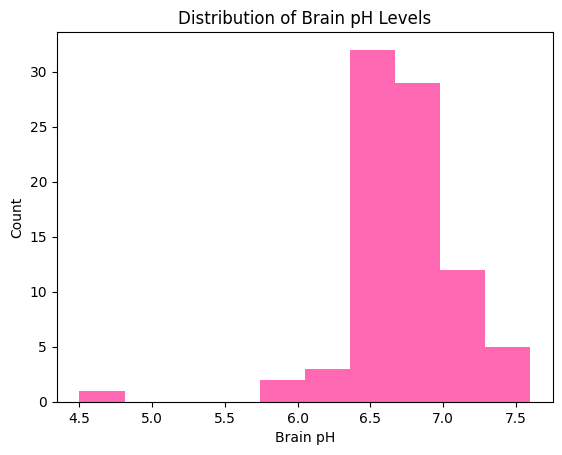

In [75]:
#Creat Histogram of brain pH
plt.hist(brain_ph, color = "hotpink")
plt.xlabel('Brain pH')
plt.ylabel('Count')
plt.title('Distribution of Brain pH Levels')

Text(0.5, 1.0, 'Distribution of PMI Levels')

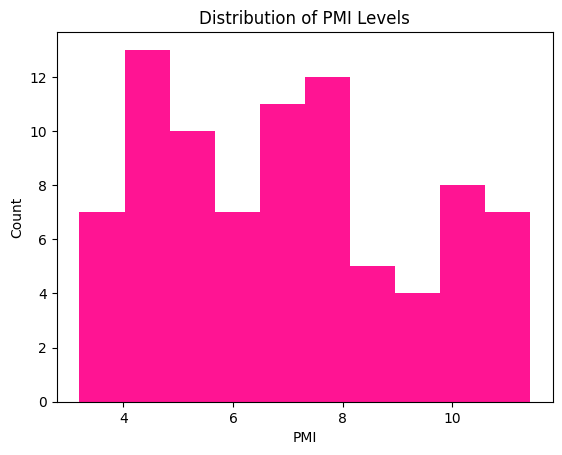

In [76]:
#Creat Histogram of PMI
plt.hist(PMI, color = "deeppink")
plt.xlabel('PMI')
plt.ylabel('Count')
plt.title('Distribution of PMI Levels')

Text(0.5, 1.0, 'Distribution of AT8 Layer 1 Percent Positive Area')

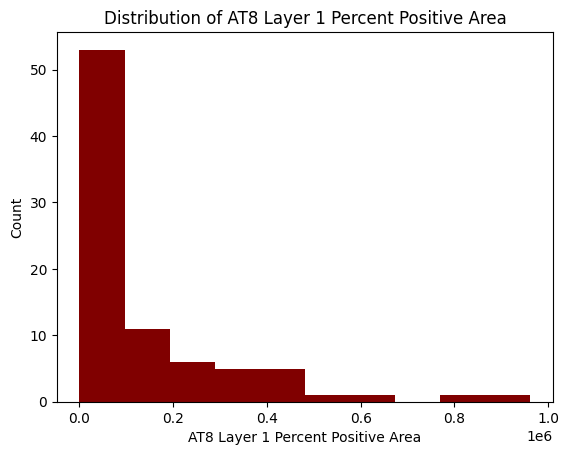

In [77]:
#Creat Histogram of AT8 layer 1 positive area percent
plt.hist(AT8layer1_percentposarea, color = "maroon")
plt.xlabel('AT8 Layer 1 Percent Positive Area')
plt.ylabel('Count')
plt.title('Distribution of AT8 Layer 1 Percent Positive Area')

Text(0.5, 1.0, 'Distribution of AT4 Layer 1 Percent Positive Area')

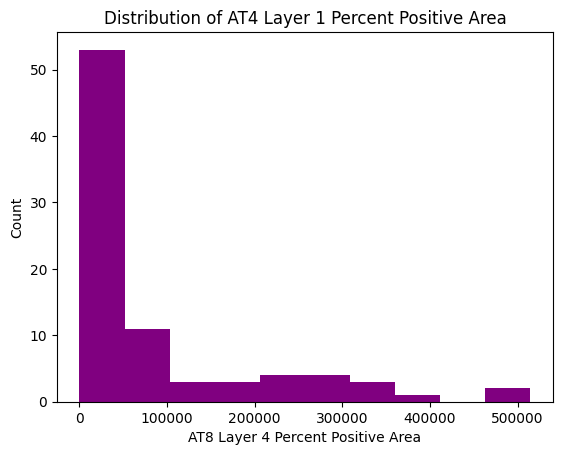

In [78]:
#Creat Histogram of AT8 layer 4 positive area percent
plt.hist(AT8layer4_percentposarea, color = "purple")
plt.xlabel('AT8 Layer 4 Percent Positive Area')
plt.ylabel('Count')
plt.title('Distribution of AT4 Layer 1 Percent Positive Area')

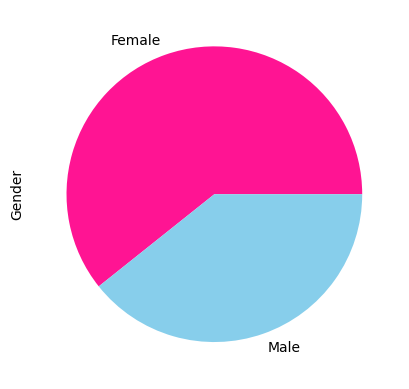

In [79]:
#Create pie plot of men v women
colors = ['deeppink', 'skyblue']
alz_ID['Sex'].value_counts().plot(kind='pie', colors=colors)

# Add y label
plt.ylabel('Gender')

# Show the plot!
plt.show()

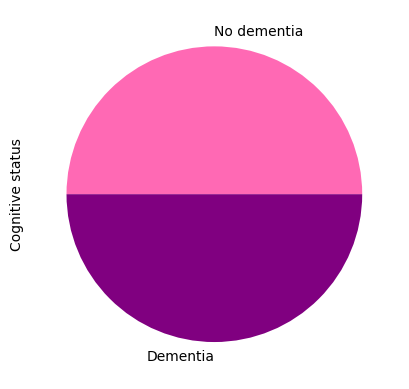

In [80]:
#Create pie plot of cognitive status
colors = ['hotpink', 'purple']
alz_ID['Cognitive Status'].value_counts().plot(kind='pie', colors = colors)


# Add y label
plt.ylabel('Cognitive status')

# Show the plot!
plt.show()

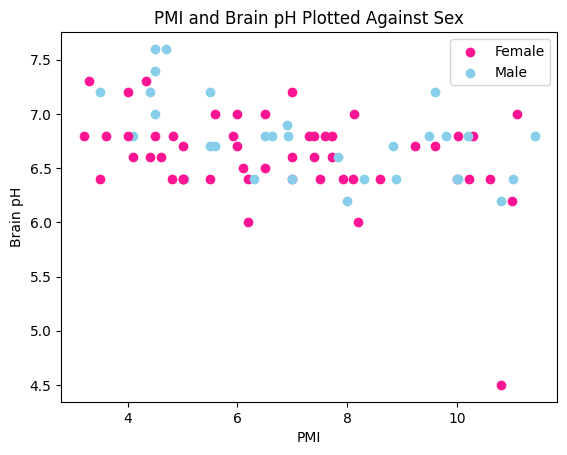

In [81]:
#Making a scatterplot 
alz_ID_length = len(alz_ID)

for i in range(alz_ID_length):
  if alz_ID.iloc[i,4]== 'Female':
    plt.scatter(alz_ID.iloc[i,-17],alz_ID.iloc[i,52], color="deeppink")
  else:
    plt.scatter(alz_ID.iloc[i,-17],alz_ID.iloc[i,52], color="skyblue")   
    plt.ylabel("Brain pH")
    plt.xlabel("PMI")
    plt.legend(['Female', 'Male'])
    plt.title("PMI and Brain pH Plotted Against Sex")   
   

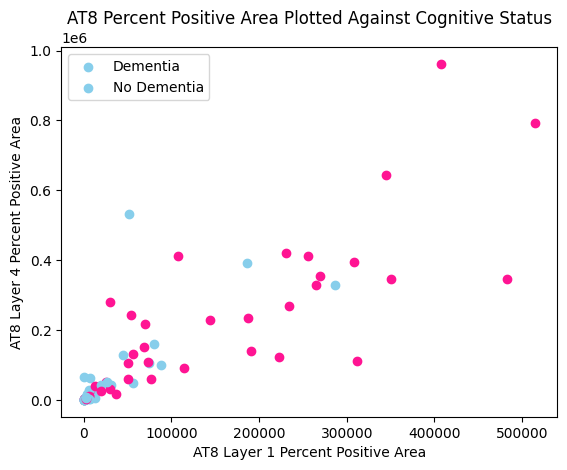

In [84]:
alz_combined_length = len(combined_data)

for i in range(alz_combined_length):
  if combined_data.iloc[i,-1]== 'Dementia':
    plt.scatter(combined_data.iloc[i,-2],combined_data.iloc[i,-3], color="deeppink")
  else:
    plt.scatter(combined_data.iloc[i,-2],combined_data.iloc[i,-3], color="skyblue")   
    plt.xlabel("AT8 Layer 1 Percent Positive Area")
    plt.ylabel("AT8 Layer 4 Percent Positive Area")
    plt.title("AT8 Percent Positive Area Plotted Against Cognitive Status") 
plt.legend(['Dementia', 'No Dementia'])